<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%207/Week%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
from PIL import Image as im

## Konvulusi tanpa library
> Membuat Fungsi Konvulusi
> Fungsi konvulusi yang dibuat memiliki parameter berupa:
> 1. Citra Masukan
> 2. Kernel berupa matriks untuk memfilter citra
> 3. Nilai stride / besarnya pergeseran untuk setiap konvulusi
> 4. Nilai pad yang akan ditambahkan pada citra

## Test Membandingkan Code Konvulusi 
> Tes berikut adalah untuk membuktikan apkah kode convulusi tanpa library sudah sesuai atau belum. Kode nya dibandingkan dengan scipy

In [3]:
import numpy as np
from scipy.signal import convolve2d

def convolution2d(image, kernel, stride=1, padding=0):
    # Flip the kernel
    kernel = np.flip(kernel, axis=None)

    # Calculate the height and width of the output image
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = (height + 2 * padding - kernel_height) // stride + 1
    output_width = (width + 2 * padding - kernel_width) // stride + 1

    # Pad the input image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Create a new image with the same dtype as the input image
    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    # Perform convolution
    for y in range(0, height-kernel_height+1, stride):
        for x in range(0, width-kernel_width+1, stride):
            output_image[y//stride, x//stride] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output_image

# Membuat citra input berukuran 5x5
image = np.array([[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25]])

# Membuat kernel berukuran 2x2
kernel = np.array([[1, 1],
                   [0, 1]])

# Mengaplikasikan fungsi convolution2d pada citra dan kernel
result1 = convolution2d(image, kernel, stride=1, padding=0)

# Mengaplikasikan fungsi convolve2d dari scipy pada citra dan kernel
result2 = convolve2d(image, kernel, mode='valid')

# Menampilkan hasil konvolusi
print(result1)
print(result2)

# Membandingkan hasil konvolusi
if np.allclose(result1, result2):
    print("Hasil konvolusi sama")
else:
    print("Hasil konvolusi berbeda")

[[14 17 20 23]
 [29 32 35 38]
 [44 47 50 53]
 [59 62 65 68]]
[[14 17 20 23]
 [29 32 35 38]
 [44 47 50 53]
 [59 62 65 68]]
Hasil konvolusi sama


### Membaca gambar dan Mengkonversi ke Format Grayscale

In [4]:
img= cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.float32)

### Membuat Fungsi Konvolusi


In [5]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Flip the kernel
    kernel = np.flip(kernel, axis=None)

    # Calculate the height and width of the output image
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = (height + 2 * padding - kernel_height) // stride + 1
    output_width = (width + 2 * padding - kernel_width) // stride + 1

    # Pad the input image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Create a new image with the same dtype as the input image
    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    # Perform convolution
    for y in range(0, height-kernel_height+1, stride):
        for x in range(0, width-kernel_width+1, stride):
            output_image[y//stride, x//stride] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output_image

### 1. Average Filter

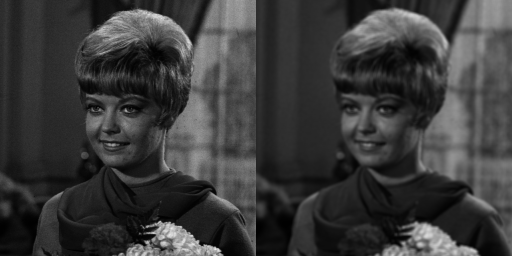

In [6]:
# Average filter
average_kernel = np.ones((3, 3)) / 9

# Apply convolution with average kernel and stride=1, padding=0
average_img = convolution2d(img_gray, average_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
average_img = cv.resize(average_img, img_gray.shape[::-1])

# Display original and low pass filtered images side by side
final_frame = np.hstack((img_gray, average_img))
cv2_imshow(final_frame)

### 2. Low Pass Filter

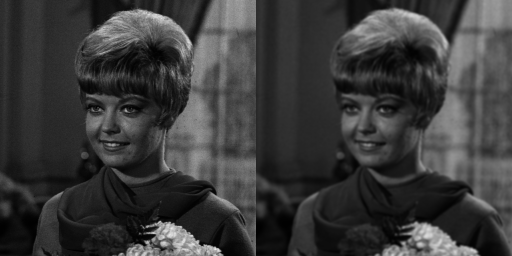

In [7]:
# Low pass filter
lowpass_kernel = np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]) / 16

# Apply convolution with low pass kernel and stride=1, padding=0
lowpass_img = convolution2d(img_gray, lowpass_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
lowpass_img = cv.resize(lowpass_img, img_gray.shape[::-1])

# Display original and low pass filtered images side by side
final_frame = np.hstack((img_gray, lowpass_img))
cv2_imshow(final_frame)

### 3. High Pass Filter

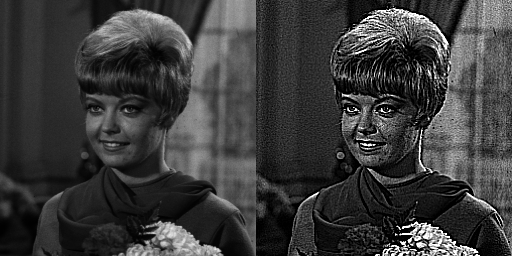

In [8]:
# High pass kernel
highpass_kernel = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])

# Apply convolution with high pass kernel and stride=1, padding=0
highpass_img = convolution2d(img_gray, highpass_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
highpass_img = cv.resize(highpass_img, img_gray.shape[::-1])

# Display original and high pass filtered images side by side
final_frame = np.hstack((img_gray, highpass_img))
cv2_imshow(final_frame)

### 4. Sharpen Filter

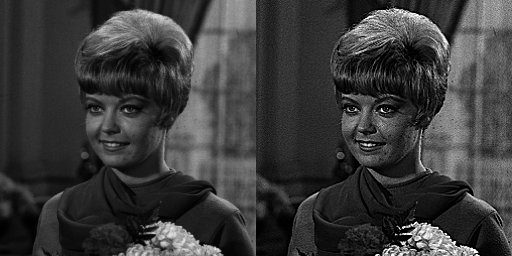

In [9]:
# Sharpen kernel
sharpen_kernel = np.array([[-0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

# Apply convolution with sharpen kernel and stride=1, padding=0
sharpen_img = convolution2d(img_gray, sharpen_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
sharpen_img = cv.resize(sharpen_img, img_gray.shape[::-1])

# Display original and sharpened images side by side
final_frame = np.hstack((img_gray, sharpen_img))
cv2_imshow(final_frame)

### 5. Emboss Filter

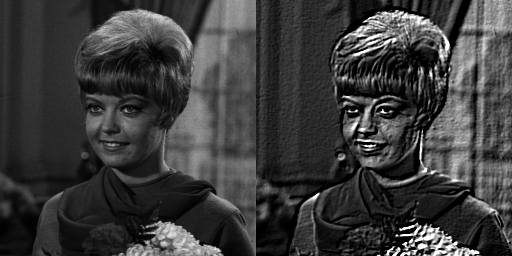

In [10]:
# Emboss kernel
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# Apply convolution with emboss kernel and stride=1, padding=0
emboss_img = convolution2d(img_gray, emboss_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
emboss_img = cv.resize(emboss_img, img_gray.shape[::-1])

# Display original and embossed images side by side
final_frame = np.hstack((img_gray, emboss_img))
cv2_imshow(final_frame)

### 6. Left Sobel edge detection

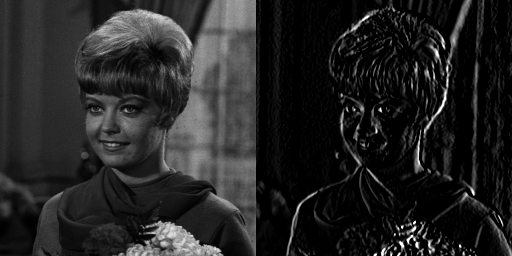

In [11]:
# Left Sobel edge detection kernel
left_sobel_edge_detection_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

# Apply convolution with left_sobel_edge_detection kernel and stride=1, padding=0
left_sobel_edge_detection_img = convolution2d(img_gray, left_sobel_edge_detection_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
left_sobel_edge_detection_img = cv.resize(left_sobel_edge_detection_img, img_gray.shape[::-1])

# Display original and left_sobel_edge_detectioned images side by side
final_frame = np.hstack((img_gray, left_sobel_edge_detection_img))
cv2_imshow(final_frame)

### 7. Canny edge detection

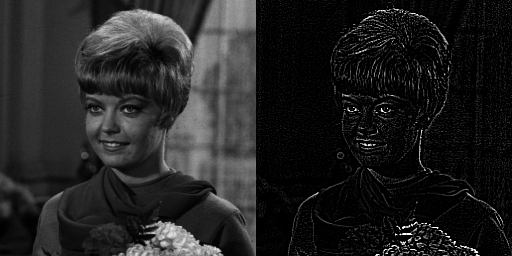

In [12]:
# Canny edge detection kernel
canny_edge_detection_kernel = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

# Apply convolution with canny_edge_detection kernel and stride=1, padding=0
canny_edge_detection_img = convolution2d(img_gray, canny_edge_detection_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
canny_edge_detection_img = cv.resize(canny_edge_detection_img, img_gray.shape[::-1])

# Display original and canny_edge_detectioned images side by side
final_frame = np.hstack((img_gray, canny_edge_detection_img))
cv2_imshow(final_frame)

### 8. Prewitt Edge Detection

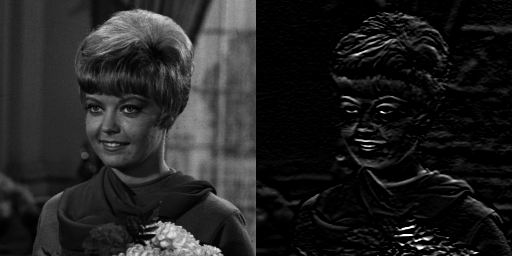

In [13]:
# Prewitt edge detection kernel
prewitt_edge_detection_kernel = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

# Apply convolution with prewitt_edge_detection kernel and stride=1, padding=0
prewitt_edge_detection_img = convolution2d(img_gray, prewitt_edge_detection_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
prewitt_edge_detection_img = cv.resize(prewitt_edge_detection_img, img_gray.shape[::-1])

# Display original and prewitt_edge_detectioned images side by side
final_frame = np.hstack((img_gray, prewitt_edge_detection_img))
cv2_imshow(final_frame)

### 9. 5x5 Gaussian Blur

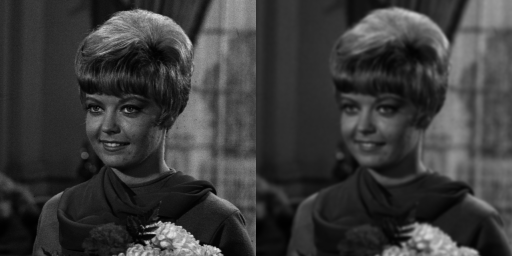

In [14]:
# 5x5 Gaussian Blur kernel
gaussian_kernel_kernel = np.array([[1, 4, 6, 4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4, 6, 4, 1]]) / 256

# Apply convolution with gaussian_kernel kernel and stride=1, padding=0
gaussian_kernel_img = convolution2d(img_gray, gaussian_kernel_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
gaussian_kernel_img = cv.resize(gaussian_kernel_img, img_gray.shape[::-1])

# Display original and gaussian_kerneled images side by side
final_frame = np.hstack((img_gray, gaussian_kernel_img))
cv2_imshow(final_frame)

### 10. 21x21 Gaussian Blur

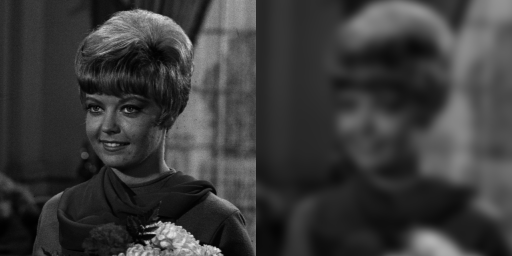

In [15]:
# 21x21 Gaussian Blur kernel

# Mendefinisikan ukuran kernel yang akan digunakan untuk filter Gaussian, dalam hal ini memiliki ukuran 21x21
kernel_size = 21
# Menghitung nilai sigma berdasarkan akar kuadrat dari kernel_size
sigma = math.sqrt(kernel_size)

# Membuat kernel filter Gaussian dengan menggunakan fungsi cv.getGaussianKernel(), yang menerima dua parameter yaitu ukuran kernel dan nilai sigma.
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)

# Melakukan operasi dot product antara kernel filter Gaussian dengan transpose-nya untuk menghasilkan kernel 2D simetris.
# Operasi ini dilakukan untuk mengoptimalkan kinerja filter saat dilakukan konvolusi.
gaussian_kernel = gaussian_kernel @ gaussian_kernel.transpose()

# Apply convolution with gaussian_kernel kernel and stride=1, padding=0
gaussian_kernel_img = convolution2d(img_gray, gaussian_kernel, stride=1, padding=0)

# Convert the output image to uint8 and resize to match the dimensions of img_gray
gaussian_kernel_img = cv.resize(gaussian_kernel_img, img_gray.shape[::-1])

# Display original and gaussian_kerneled images side by side
final_frame = np.hstack((img_gray, gaussian_kernel_img))
cv2_imshow(final_frame)